# BII

By Tan Yan Ming

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Question 1:

In [2]:
# guess and check method
import random

def right_sum(shape, target, to_print = False):
    Sum = 1
    num = 1
    
    max_right = shape[1] -1 # no of cols minus 1
    max_down = shape[0] -1 # no of rows minus 1
    max_operations = max_right + max_down
    
    num_R = ['R' for i in range(max_right)]
    num_D = ['D' for i in range(max_down)]
    
    while Sum != target:
        Op = random.sample(num_R + num_D, k = max_operations)
        if to_print == True:
            print('Op created', Op)
        
        def R():
            nonlocal Sum
            nonlocal num
            Sum += num
            if to_print == True:
                print(R, Sum, num)
            return Sum
            
        def D():
            nonlocal Sum
            nonlocal num            
            num += 1
            Sum += num
            if to_print == True:
                print(D, Sum, num)
            return Sum
        
        Sum = [R() if o=='R' else D() for o in Op][-1]
        if to_print == True:
            print(Sum)
                        
        if Sum == target:
            print(Op)
            return [str(target), ''.join(Op)]
            break
        
        # reset for every loop
        Sum = 1
        num = 1

I noticed that there are more than one operation for each summed number, but i would just report one operation per summed number, as it is very computationlly expensive.

In [3]:
# for demontration purpose of the function
a1_4x4 = np.array([right_sum((4,4), i, to_print = True) for i in [13, 16, 19]])
a1_4x4

Op created ['R', 'D', 'D', 'D', 'R', 'R']
<function right_sum.<locals>.R at 0x000002D21E2155E8> 2 1
<function right_sum.<locals>.D at 0x000002D21E215678> 4 2
<function right_sum.<locals>.D at 0x000002D21E215678> 7 3
<function right_sum.<locals>.D at 0x000002D21E215678> 11 4
<function right_sum.<locals>.R at 0x000002D21E2155E8> 15 4
<function right_sum.<locals>.R at 0x000002D21E2155E8> 19 4
19
Op created ['R', 'R', 'D', 'D', 'R', 'D']
<function right_sum.<locals>.R at 0x000002D21E215948> 2 1
<function right_sum.<locals>.R at 0x000002D21E215948> 3 1
<function right_sum.<locals>.D at 0x000002D21E2155E8> 5 2
<function right_sum.<locals>.D at 0x000002D21E2155E8> 8 3
<function right_sum.<locals>.R at 0x000002D21E215948> 11 3
<function right_sum.<locals>.D at 0x000002D21E2155E8> 15 4
15
Op created ['R', 'R', 'D', 'D', 'D', 'R']
<function right_sum.<locals>.R at 0x000002D2192E14C8> 2 1
<function right_sum.<locals>.R at 0x000002D2192E14C8> 3 1
<function right_sum.<locals>.D at 0x000002D21B6B731

array([['13', 'RRRDDD'],
       ['16', 'DRRRDD'],
       ['19', 'DRDRDR']], dtype='<U6')

In [4]:
# can run multiple times to show that theres several operations that return the same summed number
a = np.array([right_sum((9,9), i) for i in [65, 72, 90, 110]])
a

array([['65', 'RDRRRRRDRDDDRDDD'],
       ['72', 'RRRDRDDRRDDRDDRD'],
       ['90', 'DDRRRDDDRRRDDDRR'],
       ['110', 'DDDRDDDDRRDRRRRR']], dtype='<U16')

In [606]:
# import time 

# startTime = time.time()
# b = np.array(right_sum((90000,100000), 5994891682))
              
# print('The script took {0} second !'.format(time.time() - startTime))

The function above should work on extremely large matrix too, but its will be extremely computationally intensive.  

Hence, the only way i could think of solving this (at the moment) is to do it manually to find the path.  

Also i noticed that the value 87127231192 is way to big to be achieve by the matrix. Proof is shown below.

In [609]:
# showing that the maximum achieveable value from the matrix is still smaller than 87127231192
max = sum(range(1,90001)) + 90000*99998
print(max)
87127231192 > max

13049865000


True

Repeat the same for 5994891682

In [610]:
'''the last range is via trial and error to get the smallest remainder'''
print(5994891682 - sum(range(1,90001)) - sum(range(1,62367)))
steps_left = (90000-1)+(100000-1) - 90000 - len(range(1,62367))
print('steps left =', steps_left) 
print()

'''to decompose the remainder'''
print(56521 - 50000 - 6000 - 500 - 20 - 1)
print()

'''add those decomposed values that are smaller than the steps_left as 1''' 
ones = 6000 + 500 + 20 + 1

'''added 1 as there are 1 untouched decomposed values that were not regarded as ones''' 
steps_left -= (ones + 1)
print('steps left =', steps_left)

'''use the steps left as ones again'''
ones += steps_left

'''obtain the numerical list for 5994891682, and saved as b'''
b = np.ones((ones), int).tolist() + list(range(1,90001)) + list(range(1,62367)) + [50000 - steps_left] 

'''check'''
sum(b2), len(b2)

56521
steps left = 37632

0

steps left = 31110


(5994891682, 189998)

In [613]:
b = sorted(b)

B = ['R']
for i in range(len(b)-1):
    if b[i] == b[i+1]:
        B.append('R')
    else:
        B.append('D')

# check the number of down and right steps taken
(np.array(B) == 'D').sum(), (np.array(B) == 'R').sum()

(89999, 99999)

In [616]:
def check(Op):
    Sum = 0
    num = 1

    def R():
        nonlocal Sum
        nonlocal num
        Sum += num
        return Sum

    def D():
        nonlocal Sum
        nonlocal num            
        num += 1
        Sum += num
        return Sum

    Sum = [R() if o=='R' else D() for o in Op][-1]
    return Sum

check(B)

5994891682

In [634]:
blank = np.array([['', '']])
a1 = np.concatenate([a, blank, np.array([str(5994891682), ''.join(B)]).reshape(1,2)])

In [635]:
df1 = pd.DataFrame({'summed_number': a1.T[0],
                   'operation': a1.T[1]})
df1

,summed_number,operation
0,65,RDRRRRRDRDDDRDDD
1,72,RRRDRDDRRDDRDDRD
2,90,DDRRRDDDRRRDDDRR
3,110,DDDRDDDDRRDRRRRR
4,,
5,5994891682,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...


In [636]:
df1.to_csv('./answers/output_question_1', header=None, index=None, sep=' ')

## Question 2: 

### Formulating 

![answer](./answers/output_question_2.jpeg)

## Question 3: 

In [5]:
from keras.models import Model, Sequential
from keras.layers import Dense

import tqdm
from tqdm.keras import TqdmCallback

Using TensorFlow backend.


In [6]:
# load data
X_train = pd.read_csv('./programming_interview_v10/Question 3/train_data.txt', sep = "\t", header = 0).to_numpy()
y_train = pd.read_csv('./programming_interview_v10/Question 3/train_truth.txt', sep = "\t", header = 0).to_numpy()
X_test = pd.read_csv('./programming_interview_v10/Question 3/test_data.txt', sep = "\t", header = 0).to_numpy()

X_train.shape, y_train.shape, X_test.shape

((10000, 3), (10000, 1), (2500, 3))

In [637]:
# define model
def model():
    
    model = Sequential()
    
    # input layer/first hidden layer
    model.add(Dense(4, input_dim = X_train.shape[1], activation='relu'))
    
    # hidden layers
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))

    # output layer
    model.add(Dense(1, activation = 'linear'))
    
    model.compile(loss = "mean_squared_error",
                  optimizer = 'adam', metrics = ['mean_absolute_percentage_error']) 
    

    return model

# Early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'mean_absolute_percentage_error', verbose = 1,
                   patience = 100, min_delta = 0.00001)

model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [8]:
# training
model = model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.1, 
                    epochs = 5000, verbose = 0,
                    batch_size = X_train.shape[0],                   
                    callbacks = [TqdmCallback(verbose=1), es]
                     )


Epoch 03684: early stopping


Training mape: 2.91% / val mape: 2.77%
Training loss: 0.00013 / val loss: 0.00014
Training stopped at epoch: 3684


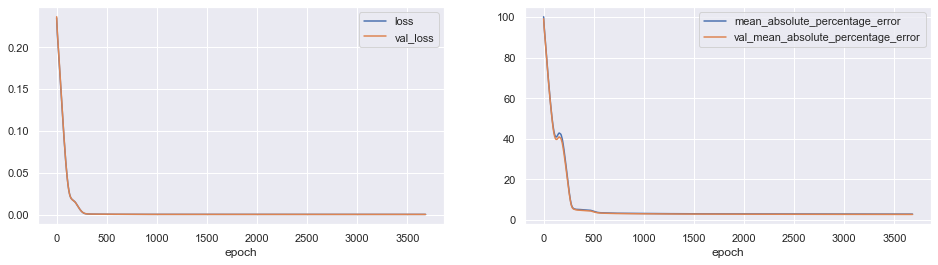

In [10]:
his = pd.DataFrame(history.history)
his['epoch'] = history.epoch

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

his.plot(x='epoch', y=['loss', 'val_loss'], ax=ax[0])
his.plot(x='epoch', y=['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error'], ax=ax[1])

print("Training mape: %.2f%% / val mape: %.2f%%" % 
      (history.history['mean_absolute_percentage_error'][-1], history.history['val_mean_absolute_percentage_error'][-1]))
print("Training loss: %.5f / val loss: %.5f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))
print('Training stopped at epoch:', int(his.iloc[-1]['epoch']+1))

In [14]:
y_pred = model.predict(X_test)
print(y_pred.shape)
# np.savetxt('./answers/test_predicted.txt', y_pred)

(2500, 1)


## Question 4: 

[library source](https://kite.com/python/docs/skimage.measure.label)

__skimage.measure.label__  

With the lack of a better explanation, it simply works to label connected regions of an integer array.

__Parameters used__

    input : ndarray of dtype int (Image to label).  
    neighbors : {4, 8}, int, optional - Whether to use 4- or 8-"connectivity". In 3D, 4-"connectivity" means connected pixels have to share face, whereas with 8-"connectivity", they have to share only edge or vertex. 

In [15]:
from skimage.measure import label

img4 = pd.read_csv('./programming_interview_v10/Question 4/input_question_4', sep = "\t", header = None).to_numpy()
print(img4.shape)
img4

(10, 20)


array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [157]:
labeled = label(img4, neighbors = 8)
print('There are', labeled.max(), 'clusters, based on 8-connectivity.')
labeled

There are 8 clusters, based on 8-connectivity.


array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 3, 0, 4, 4, 4, 0, 0, 2, 2],
       [5, 0, 5, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0],
       [0, 5, 5, 5, 5, 5, 5, 0, 2, 0, 2, 0, 6, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2],
       [5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2],
       [5, 5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2],
       [5, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2],
       [0, 5, 0, 0, 0, 5, 5, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2],
       [0, 0, 5, 5, 5, 0, 0, 5, 0, 5, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0],
       [7, 0, 5, 0, 5, 0, 5, 5, 5, 5, 0, 0, 2, 0, 8, 0, 0, 0, 0, 2]],
      dtype=int64)

In [17]:
np.savetxt('./answers/output_question_4', labeled, fmt='%d')

## Question 5: 

In [703]:
def cal(grid):
    
    penalty = 0
    
    L = grid.shape[0]
    ravel = grid.ravel()
    
    for i in range(len(ravel)-1):  
        # compare to the right
        if ravel[i] == ravel[i+1]:
                if (i+1)%L != 0:
                    penalty += 1
                    print(i, 'L')
        # compare to the left
        if i != 0:
            if ravel[i] == ravel[i-1]:
                if i%L != 0: 
                    penalty += 1
                    print(i, 'R')
        # compare to the top        
        if i < len(ravel) - L:
            if ravel[i] == ravel[i + L]:
                penalty += 1
                print(i, 'T')
        # compare to the bottom
        if i > L:
            if ravel[i] == ravel[i - L]:
                penalty += 1
                print(i, 'B')                
    return penalty

### Question 5.1

In [704]:
R = ['R' for i in range(12)]
B = ['B' for i in range(13)]

# create the square grid
L = np.zeros((5,5)).astype('int').astype('str')
L, R, B

(array([['0', '0', '0', '0', '0'],
        ['0', '0', '0', '0', '0'],
        ['0', '0', '0', '0', '0'],
        ['0', '0', '0', '0', '0'],
        ['0', '0', '0', '0', '0']], dtype='<U11'),
 ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],
 ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'])

In [705]:
# logically the answer is just to alternate the colours
for i in range(len(L.ravel())): 
    l = L.ravel()

    if i%2 == 0:
        l[i] = B.pop()
        
    elif i%2 != 0:
        l[i] = R.pop()
        
L = l.reshape(L.shape)
L

array([['B', 'R', 'B', 'R', 'B'],
       ['R', 'B', 'R', 'B', 'R'],
       ['B', 'R', 'B', 'R', 'B'],
       ['R', 'B', 'R', 'B', 'R'],
       ['B', 'R', 'B', 'R', 'B']], dtype='<U11')

In [702]:
# calculate the penalty of L
print('penalty =', cal(L))

penalty = 0


In [33]:
np.savetxt('./answers/output_question_5_1', L.astype('str'), fmt = '%s')

### Question 5.2

Note: Since it is computationally impossible to permute all the combinations, i shall proceed this question with mere logic.  

Since np.size(L)/2 = 2048, and len(G) + len(W) sums up to be 2049, they will take all alternate postions in the grid. This would leave one W in the list, and it will be used to fill the first row second column.

In [707]:
L = np.zeros((64,64)).astype('int').astype('str')

R = ['R' for i in range(139)]
B = ['B' for i in range(1451)]
G = ['G' for i in range(977)]
W = ['W' for i in range(1072)]
Y = ['Y' for i in range(457)]

for row in range(len(L)):
    if row%2 == 0:
        for col in range(0, len(L), 2):
            try:
                L[row][col] = G.pop() 
            except:
                L[row][col] = W.pop()
                
    elif row%2 != 0:
        for col in range(1, len(L), 2):
            try:
                L[row][col] = G.pop()
            except:
                L[row][col] = W.pop()

# fill the first row second column with the last W 
L[0][1] = W.pop() 

In [708]:
# observe
print(len(L[L == 'W']), len(L[L == 'G'])) 
print('Items left on the W, G list:', len(W), len(G))
L

1072 977
Items left on the W, G list: 0 0


array([['G', 'W', 'G', ..., '0', 'G', '0'],
       ['0', 'G', '0', ..., 'G', '0', 'G'],
       ['G', '0', 'G', ..., '0', 'G', '0'],
       ...,
       ['0', 'W', '0', ..., 'W', '0', 'W'],
       ['W', '0', 'W', ..., '0', 'W', '0'],
       ['0', 'W', '0', ..., 'W', '0', 'W']], dtype='<U11')

Now, just fill the remaining 0 with the other coloured beads.

In [709]:
L = L.ravel()
for index, colour in enumerate(L):
    if colour == '0':
        try:
            L[index] = R.pop()
        except:
            break

for index, colour in enumerate(L):
    if colour == '0':
        try:
            L[index] = B.pop()
        except:
            break
            
for index, colour in enumerate(L):
    if colour == '0':
        try:
            L[index] = Y.pop()
        except:
            break

In [710]:
print(len(L[L == 'R']), len(L[L == 'B']), len(L[L == 'G']), len(L[L == 'W']), len(L[L == 'Y'])) 
L = L.reshape((64,64))
L

139 1451 977 1072 457


array([['G', 'W', 'G', ..., 'R', 'G', 'R'],
       ['R', 'G', 'R', ..., 'G', 'R', 'G'],
       ['G', 'R', 'G', ..., 'R', 'G', 'R'],
       ...,
       ['Y', 'W', 'Y', ..., 'W', 'Y', 'W'],
       ['W', 'Y', 'W', ..., 'Y', 'W', 'Y'],
       ['Y', 'W', 'Y', ..., 'W', 'Y', 'W']], dtype='<U11')

In [711]:
# calculate the penalty of L
print('penalty =', cal(L))

penalty = 0


In [29]:
np.savetxt('./answers/output_question_5_2', L.astype('str'), fmt = '%s')

## Question 6

In [ ]:
# conda install -c conda-forge shapely

In [132]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# jsut for visualization
import cv2 as cv2


[__Shapely docs__](https://shapely.readthedocs.io/en/latest/manual.html)

__Polygons__  
class Polygon(shell[, holes=None])  
The Polygon constructor takes two positional parameters. The first is an ordered sequence of (x, y[, z]) point tuples and is treated exactly as in the LinearRing case. The second is an optional unordered sequence of ring-like sequences specifying the interior boundaries or “holes” of the feature.  

Rings of a valid Polygon may not cross each other, but may touch at a single point only. Again, Shapely will not prevent the creation of invalid features, but exceptions will be raised when they are operated on.

__Points__  
class Point(coordinates)  
The Point constructor takes positional coordinate values or point tuple parameters.

In [145]:
# generating dataframe for the input coordinates
df6 = pd.DataFrame({'x' : [7, 10, 11, 12, 16, 16, 17, 18, 18, 20],
                           'y' : [11, 14, 4, 21, 3, 10, 4, 7, 17, 7]})
df6.T

,0,1,2,3,4,5,6,7,8,9
x,7,10,11,12,16,16,17,18,18,20
y,11,14,4,21,3,10,4,7,17,7


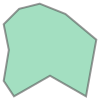

In [134]:
poly = [[4, 3],
        [2, 6],
        [3, 12],
        [2, 17],
        [5, 20],
        [9, 21],
        [14, 19],
        [20, 14],
        [18, 3],
        [11, 7]]
polygon = Polygon(poly)
polygon

In [144]:
out6 = []

for index, row in df6.iterrows():
    point = Point(row.x, row.y)
    if polygon.contains(point) == True:
        out6.append('inside')
    else:
        out6.append('outside')
    
df6['inside_or_outside'] = out6
df6.T

,0,1,2,3,4,5,6,7,8,9
x,7,10,11,12,16,16,17,18,18,20
y,11,14,4,21,3,10,4,7,17,7
inside_or_outside,inside,inside,outside,outside,outside,inside,inside,inside,outside,outside


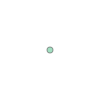

In [135]:
point

In [37]:
df6.to_csv('./answers/output_question_6', header=None, index=None, sep=' ')

### Visualisation/Verification

In [38]:
def show(image, title = 'Image', figsize = (5, 5)):
    plt.figure(figsize = figsize)
    plt.imshow(image, cmap = 'gray')
    plt.title(title)
    plt.axis('off')

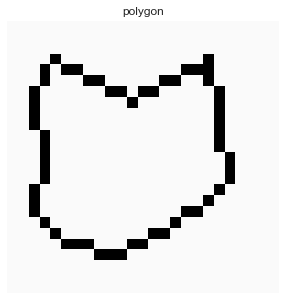

In [712]:
# create a whitish image to draw the polygon
empty = np.zeros((25,25,3), dtype=np.uint8)
empty.fill(250)

pts = np.array(poly, int)
pts = pts.reshape((-1,1,2))

# Syntax: cv2.polylines(image, [pts], isClosed, color, thickness)
cv2.polylines(empty, [pts], True, (0,0,0), 1) 
show(empty, 'polygon')

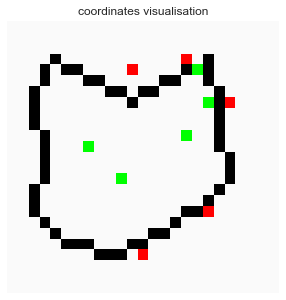

In [40]:
for index, row in df6.iterrows():
    if row.inside_or_outside == 'inside':
        cv2.circle(empty, (row.x, row.y), 0, (0,255,0), 0)
    else: 
        cv2.circle(empty, (row.x, row.y), 0, (255,0,0), 0)

show(empty, 'coordinates visualisation')

## Question 7:

### Question 7.1a: 

Mathematical equation for 2D.

__Answer__

The equation to convert coords to index can be represented as the following equation:

\begin{eqnarray}
I_{(x_1,x_2)} = x_1 + L_1 * x_2
\end{eqnarray}

Whereas, the inverse equations to convert index into coords for 2D can be represented as,

\begin{eqnarray}
x_1,x_2 = I mod L_1, floor(\frac{I}{L_1})
\end{eqnarray}

where floor() is the floor function, and mod is the modulo operation.

#### Question 7.1b

grid = (50, 57)

- Convert coords to index

In [119]:
coor7 = pd.read_csv('./programming_interview_v10/Question 7/Question 7.1/input_coordinates_7_1.txt', sep = "\t")
print(coor7.shape)
coor7.head(2)

(1425, 2)


,x1,x2
0,16,55
1,27,10


In [120]:
coor7['index'] = coor7.x1 + 50*coor7.x2
coor7.head(2)

,x1,x2,index
0,16,55,2766
1,27,10,527


In [114]:
coor7['index'].to_csv('./answers/output_index_7_1.txt', header = True, index=None, sep='\t')

- convert index to coords  

In [115]:
index7 = pd.read_csv('./programming_interview_v10/Question 7/Question 7.1/input_index_7_1.txt')
index7.head(2)

,index
0,2283
1,332


In [121]:
index7['x1'] = index7['index'] % 50
index7['x2'] = index7['index'] // 50

index7.head(2)

,index,x1,x2
0,2283,33,45
1,332,32,6


In [118]:
index7.loc[:,'x1':'x2'].to_csv('./answers/output_coordinates_7_1.txt', header = True, index=None, sep='\t')

- Convert coords to index

### Question 7.2a: 

__Answer__

The equation to convert coords to index can be represented as the following equation:

\begin{eqnarray}
I_{(x_1,x_2, ..., x_d)} = x_1 + (L_1 * x_2) +  (L_1 * L_2 * x_3)  +  ... +  (L_1 * L_2 * \cdot\cdot\cdot * L_{d-1}) * x_d)
\end{eqnarray}

Whereas, the inverse equation to convert index into coords can be represented as,

\begin{eqnarray}
x_1,x_2, ..., x_d = I mod L_1, floor(\frac{I mod \[L_1*L_2\]}{L_1}), ..., floor(\frac{I mod \[L_1 * L_2 * \cdot\cdot\cdot * L_{d-2}\]}{L_1 * L_2 * \cdot\cdot\cdot * L_{d-2}}) , floor(\frac{I}{L_1 * L_2 * \cdot\cdot\cdot * L_{d-1}})
\end{eqnarray}

where floor() is the floor function, and mod denotes the modulo operation.

#### Question 7.2b


6D = (4, 8, 5, 9, 6, 7),

- convert coords to index  

In [74]:
coor7_2 = pd.read_csv('./programming_interview_v10/Question 7/Question 7.2/input_coordinates_7_2.txt', sep = "\t")
coor7_2.head()

,x1,x2,x3,x4,x5,x6
0,3,2,2,7,4,6
1,0,0,0,0,2,5
2,0,2,1,4,5,6
3,2,7,3,4,5,6
4,2,5,1,3,1,2


In [122]:
coor7_2['index'] = coor7_2.x1 + 4*coor7_2.x2 + 4*8*coor7_2.x3 + 4*8*5*coor7_2.x4 + 4*8*5*9*coor7_2.x5 + 4*8*5*9*6*coor7_2.x6
coor7_2.head(2)

,x1,x2,x3,x4,x5,x6,index
0,3,2,2,7,4,6,58795
1,0,0,0,0,2,5,46080


In [79]:
coor7_2['index'].to_csv('./answers/output_index_7_2.txt', header = True, index=None, sep=' ')

- convert given index to coords  

In [110]:
index7_2 = pd.read_csv('./programming_interview_v10/Question 7/Question 7.2/input_index_7_2.txt', sep = "\t")
print(index7_2.shape)
index7_2.head(2)

(30240, 1)


,index
0,42985
1,34130


In [102]:
X1=[]
X2=[]
X3=[]
X4=[]
X5=[]
X6=[]

def find_coords(I, a=4,b=8,c=5,d=9,e=6):
    x1 = I%a
    
    mod1 = I%(a*b)
    x2 = mod1//a

    mod2 = I%(a*b*c)    
    x3 = mod2//(a*b)
    
    mod3 = I%(a*b*c*d)
    x4 = mod3//(a*b*c)
    
    mod4 = I%(a*b*c*d*e)
    x5 = mod4//(a*b*c*d)
    
    x6 = I//(a*b*c*d*e)
    
    X1.append(int(x1))
    X2.append(int(x2))
    X3.append(int(x3))
    X4.append(int(x4))
    X5.append(int(x5))
    X6.append(int(x6))

In [103]:
[find_coords(i) for i in index7_2['index']]
len(X1), len(X2), len(X3), len(X4), len(X5), len(X6)

(30240, 30240, 30240, 30240, 30240, 30240)

In [104]:
index7_2['x1'] = X1
index7_2['x2'] = X2
index7_2['x3'] = X3
index7_2['x4'] = X4
index7_2['x5'] = X5
index7_2['x6'] = X6

index7_2.head()

,index,x1,x2,x3,x4,x5,x6
0,42985,1,2,3,7,5,4
1,34130,2,4,1,6,5,3
2,17187,3,0,2,8,5,1
3,30765,1,3,1,3,3,3
4,29142,2,5,0,2,2,3


In [109]:
index7_2.iloc[:, 1:].to_csv('./answers/output_coordinates_7_2.txt', header = True, index=None, sep='\t')